In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import sunpy.map as smap
import astropy.units as u
#from astropy.io import fits

In [17]:
from astropy.coordinates import SkyCoord

In [3]:
imagen = smap.Map('/Users/valeriaquinteroortega/hmi.Ic_45s.20111009_200000_TAI.2.continuum.fits')

/Users/valeriaquinteroortega/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


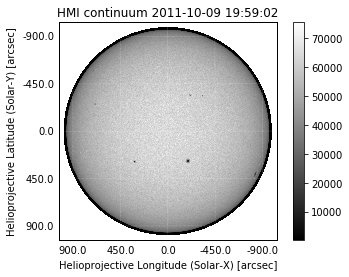

In [11]:
imagen.peek()
plt.show()

In [12]:
imagen

SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0 Angstrom
Observation Date:	 2011-10-09 19:59:02
Exposure Time:		 0.000000 s
Dimension:		 [ 4096.  4096.] pix
Coordinate System:	 helioprojective
Scale:			 [ 0.50423  0.50423] arcsec / pix
Reference Pixel:	 [ 2043.662476  2046.396118] pix
Reference Coord:	 [ 0.  0.] arcsec

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

#       En ipython la abro y busco el centroide ideal

In [16]:
x = -192*u.arcsec
y = 284.0 * u.arcsec

l = 100 * u.arcsec

In [18]:
bl = SkyCoord(x-l, y-l, frame = imagen.coordinate_frame)
ur = SkyCoord(x+l, y+l, frame = imagen.coordinate_frame)

In [22]:
submap = imagen.submap(bl,ur)

/Users/valeriaquinteroortega/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


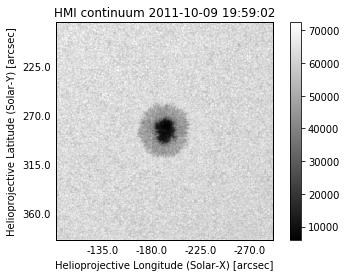

In [23]:
submap.peek()
plt.show()

# Ahora la parte de la transformación de coordenadas

In [24]:
from sunpy.coordinates import frames 

In [33]:
c0 = SkyCoord(x, y, frame = frames.Helioprojective, obstime = imagen.meta['date-obs'])

In [34]:
c0

<SkyCoord (Helioprojective: obstime=2011-10-09 19:59:02.800000, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-10-09 19:59:02.800000): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  6.25928763,  0.99881761)>): (Tx, Ty) in arcsec
    (-192.,  284.)>

In [35]:
c1 = c0.transform_to(frames.HeliographicStonyhurst)

In [36]:
c1

<SkyCoord (HeliographicStonyhurst: obstime=2011-10-09 19:59:02.800000): (lon, lat, radius) in (deg, deg, km)
    (-12.51530084,  23.2451697,  695507.99999908)>